![Astrofisica Computacional](../../logo.png)

---
## Spectros en archivos  `FITS`.


Eduard Larrañaga (ealarranaga@unal.edu.co)

---

### Resumen

En este cuaderno se untilizará la librería `astropy` para leer un archivo .fits y visualizar un espectro astronómico.


---

## 1. Los datos .FITS 

Ahora se descargará un espectro de una galaxia en formato .fits desde el SDSS Database. Para ello vaya a

https://dr16.sdss.org/

y haga click en la sección de **Optical Spectra**. Seleccione para acceder al espectro en el PlateID 271. Desde la tabla de espectros, descargue el archivo correspondiente a la FiberID 5, con el specobj_id: 305120280735410176. 

De esta forma, la identificación completa del espectro será

Plate: 271\
MJD: 51883\
Fiber: 5

También es posible encontrar este espectro utilizando esta información en la página

https://dr16.sdss.org/optical/spectrum/search


El archivo .fits descargado corresponde al espectro de la galaxia  SDSS J102008.09-004750.7. La información completa de este objeto puede verse al hacer click en el link CAS en la tabla de espectros, que llevará a la página

http://skyserver.sdss.org/dr16/en/tools/explore/summary.aspx?plate=271&mjd=51883&fiber=5



---

### 1.1. Abrir el archivo .fits

De nuevo se utilizará la función `astropy.io.fits.open()` para acceder a la información del archivo, pero esta vez incluiremos la opción `memmap=True` para prevenir inconvenientes con el almacenamiento en RAM.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

from astropy.io import fits
from astropy.table import Table

hdul = fits.open('spec-0271-51883-0005.fits', memmap=True)
hdul.info()

Filename: spec-0271-51883-0005.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     140   ()      
  1  COADD         1 BinTableHDU     26   3827R x 8C   [E, E, E, J, J, E, E, E]   
  2  SPECOBJ       1 BinTableHDU    262   1R x 126C   [6A, 4A, 16A, 23A, 16A, 8A, E, E, E, J, E, E, J, B, B, B, B, B, B, J, 22A, 19A, 19A, 22A, 19A, I, 3A, 3A, 1A, J, D, D, D, E, E, 19A, 8A, J, J, J, J, K, K, J, J, J, J, J, J, K, K, K, K, I, J, J, J, J, 5J, D, D, 6A, 21A, E, E, E, J, E, 24A, 10J, J, 10E, E, E, E, E, E, E, J, E, E, E, J, E, 5E, E, 10E, 10E, 10E, 5E, 5E, 5E, 5E, 5E, J, J, E, E, E, E, E, E, 25A, 21A, 10A, E, E, E, E, E, E, E, E, J, E, E, J, 1A, 1A, E, E, J, J, 1A, 5E, 5E]   
  3  SPZLINE       1 BinTableHDU     48   29R x 19C   [J, J, J, 13A, D, E, E, E, E, E, E, E, E, E, E, J, J, E, E]   


Note que este archivo contiene 3 objetos HDU. En el PRIMARY se tiene la información general del archivo

In [2]:
hdul[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
TAI     =        4482562363.15 / 1st row - Number of seconds since Nov 17 1858  
RA      =            154.26373 / 1st row - Right ascension of telescope boresigh
DEC     =            0.023615  / 1st row - Declination of telescope boresight (d
EQUINOX =              2000.00 /                                                
RADECSYS= 'FK5     '           /                                                
TAIHMS  = '11:50:32.96'        / 1st row - TAI time (HH:MM:SS.SS) (TAI-UT = appr
TIMESYS = 'tai     '           / TAI, not UTC                                   
MJD     =                51883 / MJD of observation                             
MJDLIST = '51879 51883'     

En el header del `hdul[1]` se tiene la información del espectro,

In [3]:
hdul[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   32 / length of dimension 1                          
NAXIS2  =                 3827 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    8 / number of table fields                         
TTYPE1  = 'flux    '                                                            
TFORM1  = 'E       '                                                            
TTYPE2  = 'loglam  '                                                            
TFORM2  = 'E       '                                                            
TTYPE3  = 'ivar    '        

### Extracción del espectro del archivo FITS 

Ahora se extraerá la informaciónd el espectro del objeto HDUN. Una descripción detallada del proceso puede verse en

http://learn.astropy.org/rst-tutorials/FITS-tables.html?highlight=filtertutorials

El objeto `hdul[1]`contiene una tabla con los nombres de las columnas. Para acceder a estos datos se utiliza el método `.columns`

In [4]:
hdul[1].columns

ColDefs(
    name = 'flux'; format = 'E'
    name = 'loglam'; format = 'E'
    name = 'ivar'; format = 'E'
    name = 'and_mask'; format = 'J'
    name = 'or_mask'; format = 'J'
    name = 'wdisp'; format = 'E'
    name = 'sky'; format = 'E'
    name = 'model'; format = 'E'
)

La información detallada acerca de este espectro se encuentra en el link del modelo spec_data,

https://data.sdss.org/datamodel/files/BOSS_SPECTRO_REDUX/RUN2D/spectra/PLATE4/spec.html

Por ejemplo, alli se puede observar que la columna ['flux'] presenta el flujo en unidades de $10^{-17}$ ergs/s/cm2/Å y la columna  ['loglam'] presenta el $\log_{10}$ ode la longitud de onda en Å.

Sin embargo, asignar los datos contenidos en el objeto hdul[1] a una variable en Python no resulta en un tipo de objeto conocido,

In [5]:
spectrum_data = hdul[1].data
type(spectrum_data)

astropy.io.fits.fitsrec.FITS_rec

En realidad, para poder cargar el espectro se debe usar la función [astropy.table.Table( )](https://docs.astropy.org/en/stable/api/astropy.table.Table.html#astropy.table.Table) 

In [6]:
from astropy.table import Table

spectrum_data = Table(hdul[1].data)

De esta forma, la información se almaceno en un objeto del tipo Table,

In [7]:
type(spectrum_data)

astropy.table.table.Table

y ahora la información se puede acceder fácilmente,

In [8]:
spectrum_data

<Table length=3827>
   flux    loglam    ivar    ...   wdisp      sky      model  
 float32  float32  float32   ...  float32   float32   float32 
--------- ------- ---------- ... --------- --------- ---------
 21.53708  3.5819 0.08127065 ... 1.2916901 10.570335 33.403244
 24.77743   3.582 0.07876171 ... 1.2898893  9.759857 33.523865
      ...     ...        ... ...       ...       ...       ...
71.695366  3.9644  0.1941352 ... 0.7083817  7.494856  70.09506
 69.85985  3.9645 0.19558352 ...  0.708248  8.147273  70.59616

### Histograma del Flujo

Podemos crear un histograma de la columna 'flux' en esta tabla,

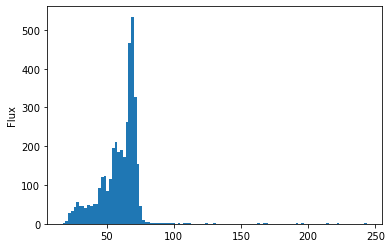

In [9]:
plt.hist(spectrum_data['flux'], bins='auto')
plt.ylabel('Flux')
plt.show()

### Visualización del Espectro

Para visualizar el espectro de esta galaxia, graficamos la columna ['flux'] vs. la columna ['loglam'].

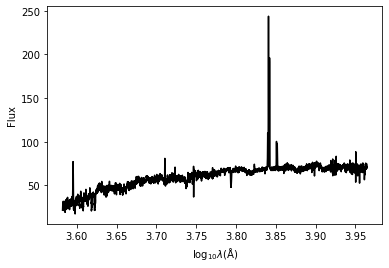

In [10]:
plt.plot(spectrum_data['loglam'],spectrum_data['flux'],'k')
plt.xlabel(r'$\log_{10} \lambda {(\rm \AA)}$')
plt.ylabel('Flux')
plt.show()

Si se quiere utilizar la longitud de onda (y no su logaritmo), definimos

In [11]:
wavelength = np.power(10,spectrum_data['loglam'])

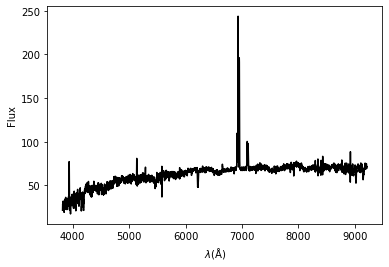

In [12]:
plt.plot(wavelength,spectrum_data['flux'],'k')
plt.xlabel(r'$\lambda {(\rm \AA)}$')
plt.ylabel('Flux')
plt.show()